In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

In [21]:
df_ccard=pd.read_csv(r"D:\Users\DELL\Downloads\creditcard.csv")

In [22]:
df_ccard.head()

,Time,V1,V2,V3,Amount,Class
0,0,-1.359807,-0.072781,2.536347,149.62,0
1,0,1.191857,0.266151,0.166480,2.69,0
2,1,-1.358354,1.340163,-0.262794,378.66,0
3,1,-0.966272,-0.185226,1.792993,123.50,0
4,2,-1.158233,0.877737,1.548718,69.99,0


In [23]:
df_ccard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
Amount    0
Class     0
dtype: int64

In [24]:
df_ccard.describe()

,Time,V1,V2,V3,Amount,Class
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.166667,-0.679462,0.531094,0.939993,120.910000,0.166667
std,1.169045,0.979933,0.617598,1.171475,140.152244,0.408248
min,0.000000,-1.359807,-0.185226,-0.262794,1.000000,0.000000
25%,0.250000,-1.308324,0.011952,-0.064718,19.515000,0.000000
50%,1.000000,-1.062252,0.571944,0.857599,96.745000,0.000000
75%,1.750000,-0.561042,0.939826,1.731924,143.090000,0.000000
max,3.000000,1.191857,1.340163,2.536347,378.660000,1.000000


In [25]:
df_ccard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    6 non-null      int64  
 1   V1      6 non-null      float64
 2   V2      6 non-null      float64
 3   V3      6 non-null      float64
 4   Amount  6 non-null      float64
 5   Class   6 non-null      int64  
dtypes: float64(4), int64(2)
memory usage: 420.0 bytes


In [26]:
print(df_ccard,5)

   Time        V1        V2        V3  Amount  Class
0     0 -1.359807 -0.072781  2.536347  149.62      0
1     0  1.191857  0.266151  0.166480    2.69      0
2     1 -1.358354  1.340163 -0.262794  378.66      0
3     1 -0.966272 -0.185226  1.792993  123.50      0
4     2 -1.158233  0.877737  1.548718   69.99      0
5     3 -0.425966  0.960523 -0.141784    1.00      1 5


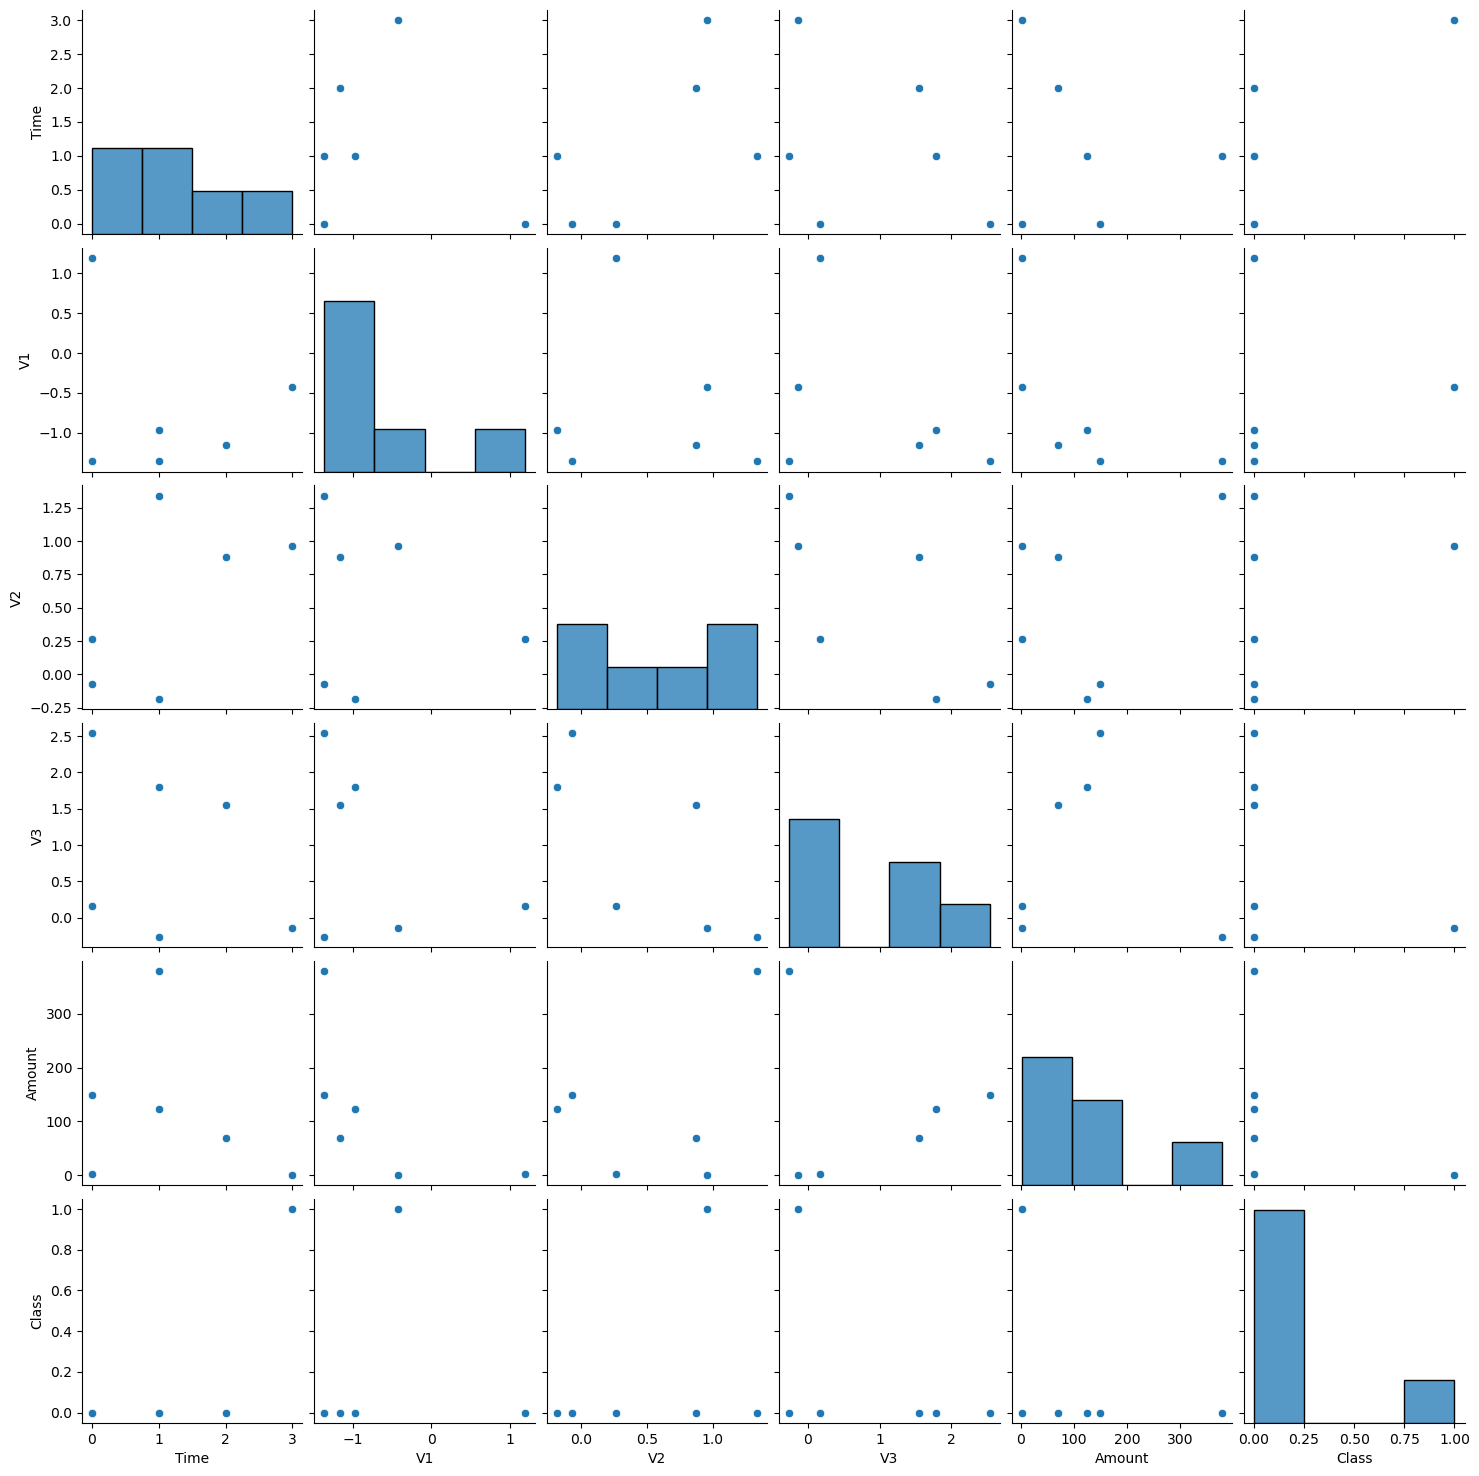

In [27]:
import seaborn as sns
sns.pairplot(df_ccard)

<Axes: >

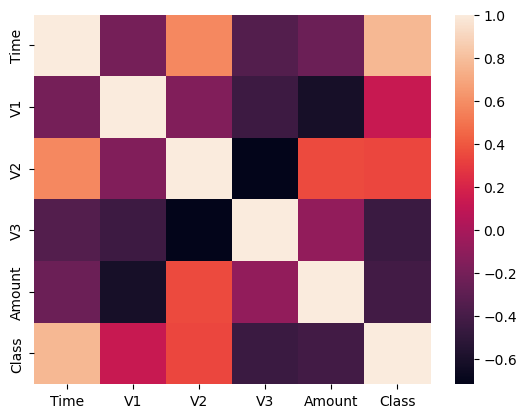

In [28]:
sns.heatmap(df_ccard.corr(numeric_only=True))

In [30]:
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [31]:
X = df.drop("target", axis=1)
y = df["target"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [33]:
model = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [34]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [36]:
print("\n Evaluation Metrics")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1-score : {f1_score(y_test, y_pred):.3f}")


 Evaluation Metrics
Confusion Matrix:
 [[50  3]
 [ 6 84]]
Precision: 0.966
Recall   : 0.933
F1-score : 0.949


In [37]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC  : {roc_auc:.3f}")


ROC AUC  : 0.938


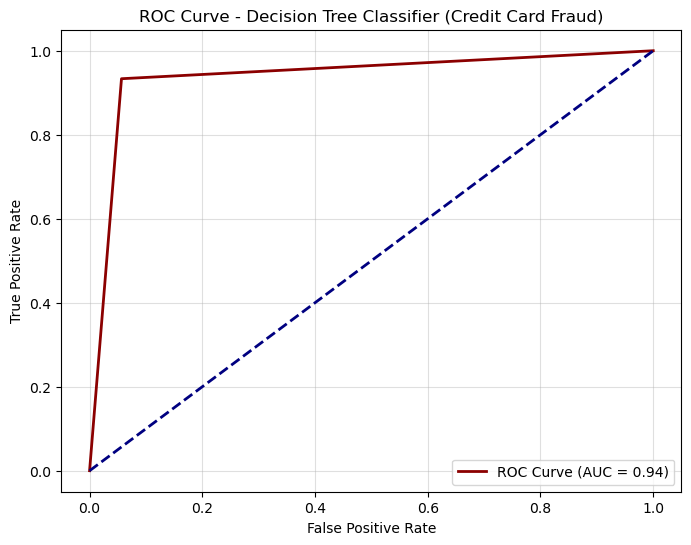

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier (Credit Card Fraud)')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()